In [2]:
from pathlib import Path
from typing import Union
import itk
import os
import time

In [4]:
BASE_PATH = Path(os.getcwd()).parent
BASE_PATH

PosixPath('/home/estudiante/curso-imageproc/medical-image-processing-project')

In [6]:
names = ["10", "11", "14"]
name = names[0]
extension = "nii.gz"
input_image = BASE_PATH / f"train_nifti/{name}/p{name}_PET_enhanced.{extension}"

In [9]:
dimensions = 3
pixel_type_in = itk.F
pixel_type_out = itk.UC
image_type_in = itk.Image[pixel_type_in, dimensions]
image_type_out = itk.Image[pixel_type_out, dimensions]

# Step 1: Read the image as float
reader = itk.ImageFileReader[image_type_in].New()
reader.SetFileName(str(input_image))
reader.Update()

image = reader.GetOutput()
size = itk.size(image)

In [11]:
np_image = itk.GetArrayFromImage(image)

In [13]:
np_image.shape

(241, 144, 144)

In [64]:
num_pixels_arr = []
for idx, z in enumerate(range(np_image.shape[0])):
    array = np_image[z,:,:]
    num_pixels = (array > 3).sum()
    num_pixels_arr.append(num_pixels)
    print(idx, " : ", num_pixels)
num_pixels_arr = np.array(num_pixels_arr).reshape(-1,1)

0  :  9913
1  :  11141
2  :  12240
3  :  13014
4  :  13397
5  :  13689
6  :  13742
7  :  13751
8  :  13944
9  :  13820
10  :  13668
11  :  13777
12  :  13888
13  :  13762
14  :  13781
15  :  13557
16  :  13468
17  :  13526
18  :  13587
19  :  13511
20  :  13617
21  :  13775
22  :  13970
23  :  14181
24  :  14144
25  :  14082
26  :  13928
27  :  13988
28  :  14315
29  :  14544
30  :  14768
31  :  14974
32  :  15088
33  :  15205
34  :  15303
35  :  14987
36  :  14711
37  :  14585
38  :  14290
39  :  14522
40  :  14681
41  :  14724
42  :  14232
43  :  14221
44  :  14141
45  :  14171
46  :  14123
47  :  14176
48  :  14302
49  :  14374
50  :  14245
51  :  14363
52  :  14579
53  :  14654
54  :  15529
55  :  15071
56  :  15284
57  :  15539
58  :  15657
59  :  15845
60  :  15787
61  :  15638
62  :  15458
63  :  14925
64  :  15126
65  :  15291
66  :  15292
67  :  15118
68  :  14779
69  :  15164
70  :  14935
71  :  15129
72  :  14729
73  :  15402
74  :  15651
75  :  15411
76  :  15221
77  :  156

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_array(arr, cmap='viridis', title='Array Visualization'):
    """
    Visualizes a 2D numpy array using imshow.

    Parameters:
    - arr: 2D numpy array
    - cmap: Colormap for visualization (default: 'viridis')
    - title: Title of the plot
    """
    if arr.ndim != 2:
        raise ValueError("Input array must be 2D")

    plt.figure(figsize=(6, 6))
    plt.imshow(arr, cmap=cmap)
    plt.colorbar(label='Value')
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.tight_layout()
    plt.show()

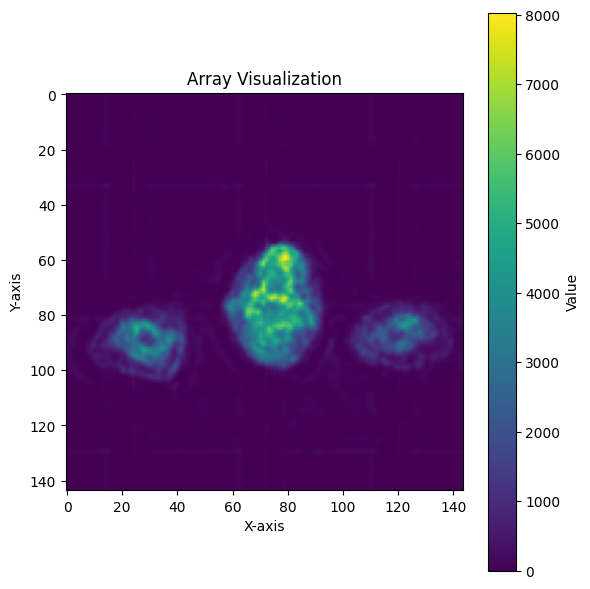

In [151]:
visualize_array(np_image[189,:,:])

In [67]:
from sklearn.cluster import KMeans
import numpy as np

# Create and fit the model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(num_pixels_arr)

# Get the cluster labels
labels = (kmeans.labels_).reshape(-1,1)

print(labels.shape)

(241, 1)


In [68]:
array_clusters = np.hstack([num_pixels_arr, labels])

In [69]:
for z in range(array_clusters.shape[0]):
    values = array_clusters[z, :]
    print(z, " : ", values)

0  :  [9913    1]
1  :  [11141     1]
2  :  [12240     1]
3  :  [13014     1]
4  :  [13397     1]
5  :  [13689     1]
6  :  [13742     1]
7  :  [13751     1]
8  :  [13944     1]
9  :  [13820     1]
10  :  [13668     1]
11  :  [13777     1]
12  :  [13888     1]
13  :  [13762     1]
14  :  [13781     1]
15  :  [13557     1]
16  :  [13468     1]
17  :  [13526     1]
18  :  [13587     1]
19  :  [13511     1]
20  :  [13617     1]
21  :  [13775     1]
22  :  [13970     1]
23  :  [14181     1]
24  :  [14144     1]
25  :  [14082     1]
26  :  [13928     1]
27  :  [13988     1]
28  :  [14315     1]
29  :  [14544     1]
30  :  [14768     0]
31  :  [14974     0]
32  :  [15088     0]
33  :  [15205     0]
34  :  [15303     0]
35  :  [14987     0]
36  :  [14711     0]
37  :  [14585     1]
38  :  [14290     1]
39  :  [14522     1]
40  :  [14681     0]
41  :  [14724     0]
42  :  [14232     1]
43  :  [14221     1]
44  :  [14141     1]
45  :  [14171     1]
46  :  [14123     1]
47  :  [14176     1]
48  

In [72]:
import pandas as pd
df = pd.DataFrame(num_pixels_arr, columns=["pixel_value"])
df["cluster"] = labels
print(df.head())

   pixel_value  cluster
0         9913        1
1        11141        1
2        12240        1
3        13014        1
4        13397        1


In [73]:
cluster_means = kmeans.cluster_centers_

print("Cluster means:", cluster_means)

Cluster means: [[15470.86928105]
 [13775.75      ]]


In [90]:
import numpy as np

# Get the current labels
labels = kmeans.labels_

# Get the cluster means
cluster_means = kmeans.cluster_centers_.flatten()

# Sort clusters by mean
sorted_indices = np.argsort(cluster_means)  # index of lower mean will be 0

# Map old labels to new ones
label_map = {old: new for new, old in enumerate(sorted_indices)}

# Apply the mapping
relabelled = np.vectorize(label_map.get)(labels)

print(relabelled)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [135]:
reversed(relabelled)

In [136]:
for idx, val in enumerate(relabelled[::-1]):
    print(idx, " : ", val)

0  :  0
1  :  0
2  :  0
3  :  0
4  :  0
5  :  0
6  :  0
7  :  0
8  :  0
9  :  0
10  :  0
11  :  0
12  :  0
13  :  0
14  :  0
15  :  0
16  :  0
17  :  0
18  :  0
19  :  0
20  :  0
21  :  0
22  :  0
23  :  0
24  :  0
25  :  0
26  :  0
27  :  0
28  :  0
29  :  1
30  :  1
31  :  1
32  :  1
33  :  1
34  :  1
35  :  1
36  :  0
37  :  0
38  :  0
39  :  0
40  :  0
41  :  0
42  :  0
43  :  0
44  :  0
45  :  0
46  :  0
47  :  0
48  :  0
49  :  0
50  :  0
51  :  1
52  :  1
53  :  1
54  :  1
55  :  1
56  :  1
57  :  1
58  :  1
59  :  1
60  :  1
61  :  1
62  :  1
63  :  1
64  :  1
65  :  1
66  :  1
67  :  1
68  :  1
69  :  1
70  :  1
71  :  1
72  :  1
73  :  1
74  :  1
75  :  1
76  :  1
77  :  1
78  :  1
79  :  1
80  :  1
81  :  1
82  :  1
83  :  1
84  :  1
85  :  1
86  :  1
87  :  1
88  :  1
89  :  1
90  :  1
91  :  1
92  :  1
93  :  1
94  :  1
95  :  1
96  :  1
97  :  1
98  :  1
99  :  1
100  :  1
101  :  1
102  :  1
103  :  1
104  :  1
105  :  1
106  :  1
107  :  1
108  :  1
109  :  1
110  :  1


In [154]:
def find_first_cluster1_sequence(labels, min_length=10):
    labels = np.array(labels)
    reversed_labels = labels[::-1]

    count = 0
    start_in_reverse = None

    for i, val in enumerate(reversed_labels):
        if val == 1:
            count += 1
            if count == min_length:
                start_in_reverse = i - min_length + 1
                break
        else:
            count = 0

    if start_in_reverse is None:
        return None  # No such sequence found

    # Convert reversed index to original index
    start_in_original = len(labels) - (start_in_reverse + 1)
    return start_in_original

In [155]:
find_first_cluster1_sequence(relabelled)

189

In [157]:


from scripts import slices

ModuleNotFoundError: No module named 'scripts'